## Simulation 1

In [21]:
import random

first_list = []
second_list = []

for i in range(10):
    first_list.append(random.randint(1, 1000))
    second_list.append(random.randint(1, 1000))

first_Ris = []
second_Ris = []

for i in range(9):
    first_Ris.append((first_list[i+1]-first_list[i])/first_list[i]*100)
    second_Ris.append((second_list[i+1]-second_list[i])/second_list[i]*100)

total_return1 = sum(first_Ris)/9
total_return2 = sum(second_Ris)/9

print("Total return of the first sequence : "+str(round(total_return1, 2)))
print("Total return of the second sequence : "+str(round(total_return2, 2)))

Total return of the first sequence : 184.83
Total return of the second sequence : 11.03


## Simulation 3

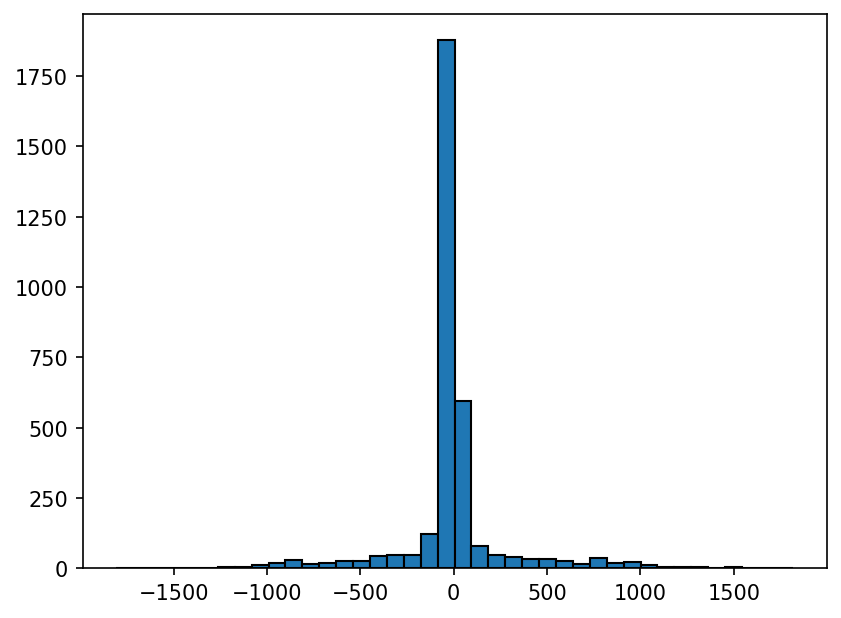

-1.2844495133819906 300.62699968071024


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

df = pd.read_excel("data.xls")

last_price = df["آخرین قیمت"]
first_price = df["قیمت دیروز"]

Ds = [lp - fp for lp, fp in zip(last_price, first_price)]

plt.hist(Ds,density=False, bins=40,edgecolor='black')
plt.gcf().set_dpi(150)
plt.show()


mean, standard_deviation = statistics.mean(Ds), statistics.stdev(Ds)
print(mean, standard_deviation)

## Simulation 4

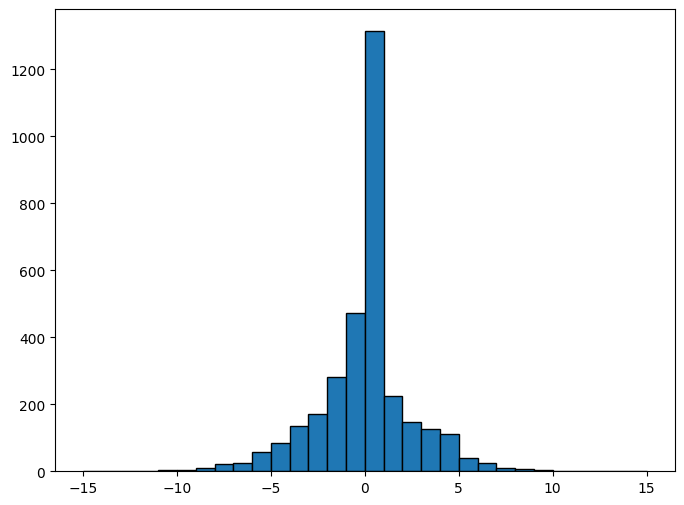

In [415]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data.xls")

p_close = df["آخرین قیمت"].to_list()
p_open = df["اولین قیمت"].to_list()

z = [(a-b)/a*100 for a,b in zip(p_close, p_open)]

plt.hist(z,density=False,range=[-15,15],bins=30,edgecolor='black')
plt.show()

## Simulation 5

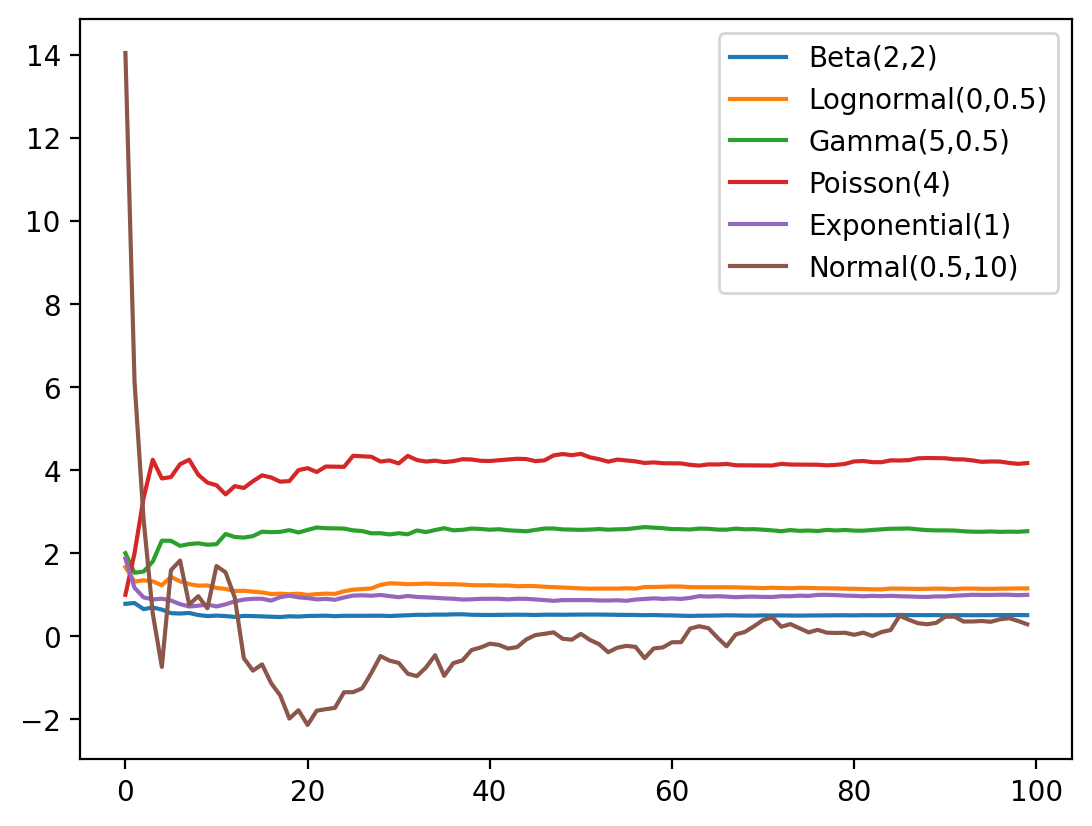

In [106]:
import numpy as np
import matplotlib.pyplot as plt

#Beta(2,2)
samples1 = np.random.beta(2, 2, size=100)
Xis1 =[]

for i in range(100):
    Xis1.append(sum(samples1[0:i+1])/(i+1))

plt.plot(Xis1)

#Lognormal(0,0.5)
samples2 = np.random.lognormal(0, 0.5, size=100)
Xis2 =[]

for i in range(100):
    Xis2.append(sum(samples2[0:i+1])/(i+1))

plt.plot(Xis2)

#Gamma(5,0.5)
samples3 = np.random.gamma(5, 0.5, size=100)
Xis3 =[]

for i in range(100):
    Xis3.append(sum(samples3[0:i+1])/(i+1))

plt.plot(Xis3)

#Poisson(4)
samples4 = np.random.poisson(4, size=100)
Xis4 =[]

for i in range(100):
    Xis4.append(sum(samples4[0:i+1])/(i+1))

plt.plot(Xis4)

#Exponential(1)
samples5 = np.random.exponential(1, size=100)
Xis5 =[]

for i in range(100):
    Xis5.append(sum(samples5[0:i+1])/(i+1))

plt.plot(Xis5)

#Normal(0.5,10)
samples6 = np.random.normal(0.5, 10, size=100)
Xis6 =[]

for i in range(100):
    Xis6.append(sum(samples6[0:i+1])/(i+1))

plt.plot(Xis6)

plt.gcf().set_dpi(200)
plt.legend(['Beta(2,2)','Lognormal(0,0.5)','Gamma(5,0.5)','Poisson(4)','Exponential(1)','Normal(0.5,10)'])



## Simulation 6

Average Final Price : 130.94


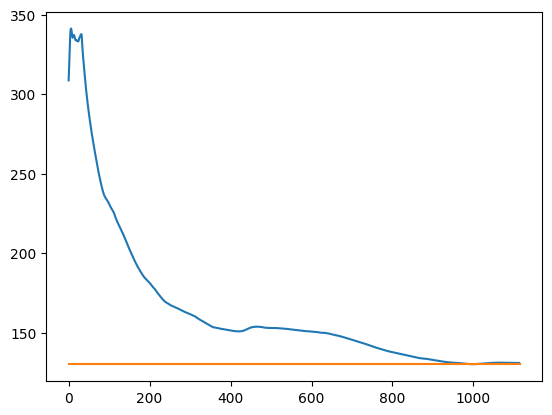

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data.xls")

last_price = df["آخرین قیمت"].tolist()

datas=[]

Xn_bar=sum(last_price[0:1115])/1115
print("Average Final Price : "+str(round(Xn_bar,2)))

for i in range(1114):
    datas.append(sum(last_price[0:i+1])/(i+1))

plt.plot(datas)

x=[0,1114]
y=[130,130]
plt.plot(x,y)
plt.show()

## Central Limit

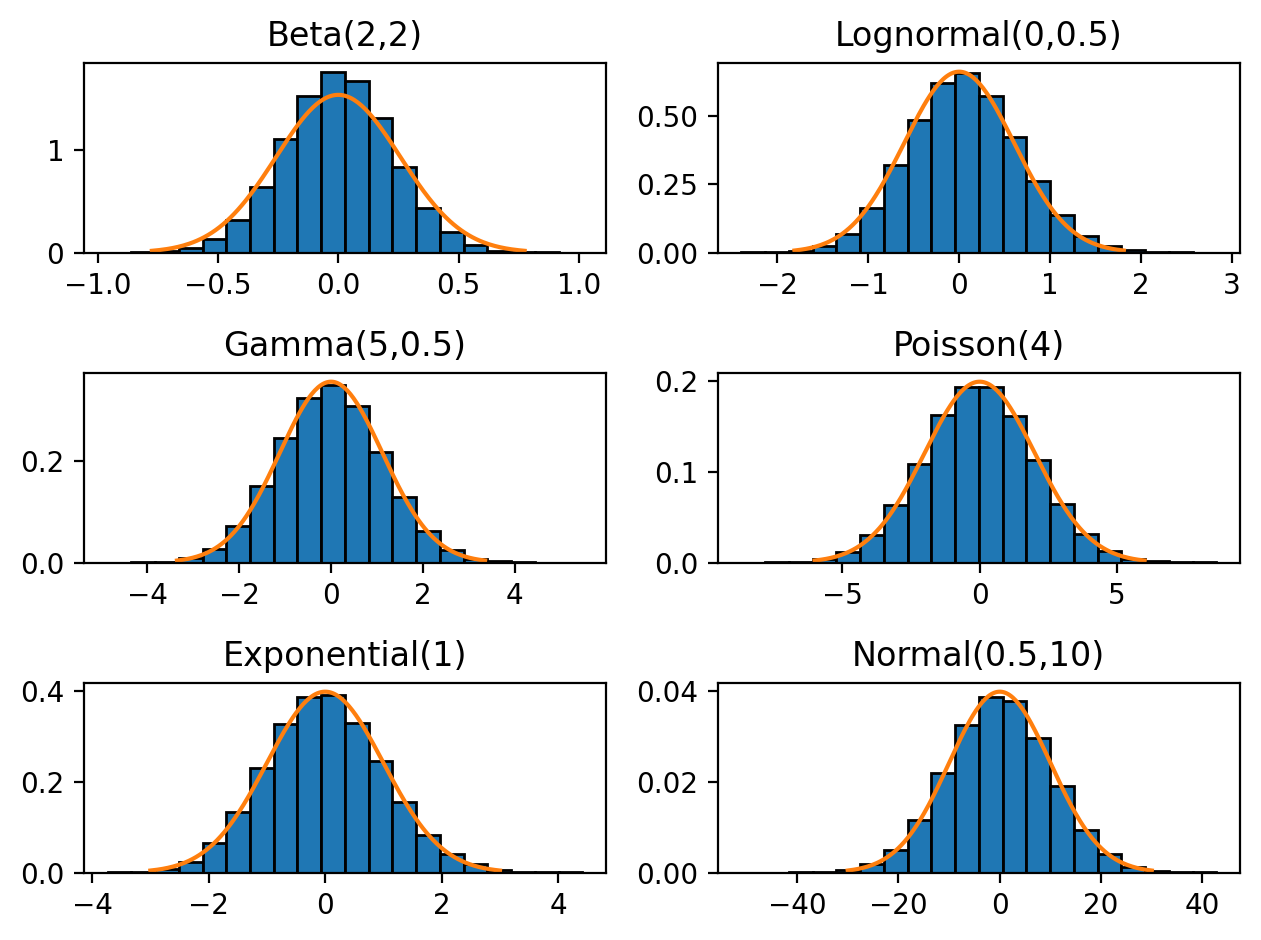

In [20]:
from scipy.stats import beta
from scipy.stats import lognorm
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def Y_calculator(n,mu,X):
    return np.sqrt(n)*((1/n)*sum(X)-mu)

fig,axs = plt.subplots(3, 2)

#Beta(2,2)
sequences1 = np.zeros((100000, 300))
for i in range(100000):
    sequences1[i] = beta.rvs(a=2, b=2, size=300)

Y1=[]
for i in range(100000):
    Y1.append(Y_calculator(300,0.5,sequences1[i]))

axs[0,0].hist(Y1,density=True, bins=20,edgecolor='black')
mu1 = 0
variance1 = 1/15
sigma1 = np.sqrt(variance1)
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 200)
y1 = norm.pdf(x1, mu1, sigma1)
axs[0,0].plot(x1, y1)
axs[0,0].set_title('Beta(2,2)')

#Lognormal(0,0.5)
sequences2 = np.zeros((100000, 300))
for i in range(100000):
    sequences2[i] = lognorm.rvs(s=0.5, scale=np.exp(0), size=300)

Y2=[]
for i in range(100000):
    Y2.append(Y_calculator(300,1.13,sequences2[i]))

axs[0,1].hist(Y2,density=True, bins=20,edgecolor='black')
mu2 = 0
variance2 = 0.364
sigma2 = np.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 200)
y2 = norm.pdf(x2, mu2, sigma2)
axs[0,1].plot(x2, y2)
axs[0,1].set_title('Lognormal(0,0.5)')

#Gamma(5,0.5)
sequences3 = np.zeros((100000, 300))
for i in range(100000):
    sequences3[i] = gamma.rvs(a=5, scale=0.5, size=300)

Y3=[]
for i in range(100000):
    Y3.append(Y_calculator(300,2.5,sequences3[i]))

axs[1,0].hist(Y3,density=True, bins=20,edgecolor='black')
mu3 = 0
variance3 = 1.25
sigma3 = np.sqrt(variance3)
x3 = np.linspace(mu3 - 3*sigma3, mu3 + 3*sigma3, 200)
y3 = norm.pdf(x3, mu3, sigma3)
axs[1,0].plot(x3, y3)
axs[1,0].set_title('Gamma(5,0.5)')

#Poisson(4)
sequences4 = np.zeros((100000, 300))
for i in range(100000):
    sequences4[i] = poisson.rvs(mu=4, size=300)

Y4=[]
for i in range(100000):
    Y4.append(Y_calculator(300,4,sequences4[i]))

axs[1,1].hist(Y4,density=True, bins=20,edgecolor='black')
mu4 = 0
variance4 = 4
sigma4 = np.sqrt(variance4)
x4 = np.linspace(mu4 - 3*sigma4, mu4 + 3*sigma4, 200)
y4 = norm.pdf(x4, mu4, sigma4)
axs[1,1].plot(x4, y4)
axs[1,1].set_title('Poisson(4)')

#Exponential(1)
sequences5 = np.zeros((100000, 300))
for i in range(100000):
    sequences5[i] = expon.rvs(scale=1, size=300)

Y5=[]
for i in range(100000):
    Y5.append(Y_calculator(300,1,sequences5[i]))

axs[2,0].hist(Y5,density=True, bins=20,edgecolor='black')
mu5 = 0
variance5 = 1
sigma5 = np.sqrt(variance5)
x5 = np.linspace(mu5 - 3*sigma5, mu5 + 3*sigma5, 200)
y5 = norm.pdf(x5, mu5, sigma5)
axs[2,0].plot(x5, y5)
axs[2,0].set_title('Exponential(1)')

#Normal(0.5,10)
sequences6 = np.zeros((100000, 300))
for i in range(100000):
    sequences6[i] = norm.rvs(loc=0.5, scale=10, size=300)

Y6=[]
for i in range(100000):
    Y6.append(Y_calculator(300,0.5,sequences6[i]))

axs[2,1].hist(Y6,density=True, bins=20,edgecolor='black')
mu6 = 0
variance6 = 100
sigma6 = np.sqrt(variance6)
x6 = np.linspace(mu6 - 3*sigma6, mu6 + 3*sigma6, 200)
y6 = norm.pdf(x6, mu6, sigma6)
axs[2,1].plot(x6, y6)
axs[2,1].set_title('Normal(0.5,10)')

fig.set_dpi(200)
fig.tight_layout()

## Simulation 7

Mean : 404.47
Variance : 943899.99


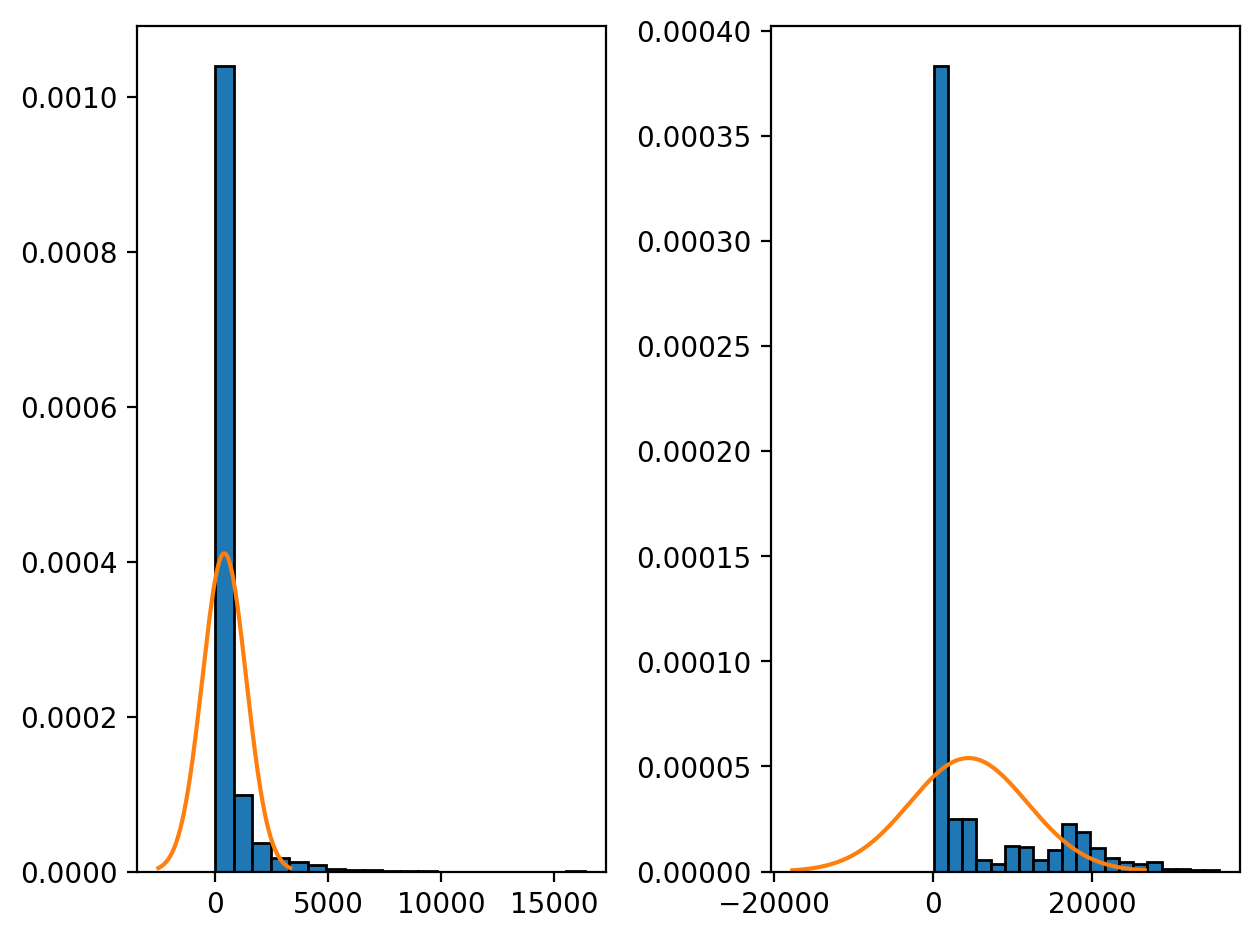

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

df = pd.read_excel("data.xls")
fig,axs = plt.subplots(1, 2)

transactions = df["تعداد معاملات"].tolist()

mean = statistics.mean(transactions)
variance = statistics.variance(transactions)

axs[0].hist(transactions,density=True, bins=20,edgecolor='black')
sigma = np.sqrt(variance)
x = np.linspace(mean - 3*sigma, mean + 3*sigma, 200)
y = norm.pdf(x, mean, sigma)
axs[0].plot(x, y)

print("Mean : "+str(round(mean,2)))
print("Variance : "+str(round(variance,2)))

last_price = df["آخرین قیمت"].tolist()

mean = statistics.mean(last_price)
variance = statistics.variance(last_price)

axs[1].hist(last_price,density=True, bins=20,edgecolor='black')
sigma = np.sqrt(variance)
x = np.linspace(mean - 3*sigma, mean + 3*sigma, 200)
y = norm.pdf(x, mean, sigma)
axs[1].plot(x, y)

fig.set_dpi(200)
fig.tight_layout()

## Simulation 8

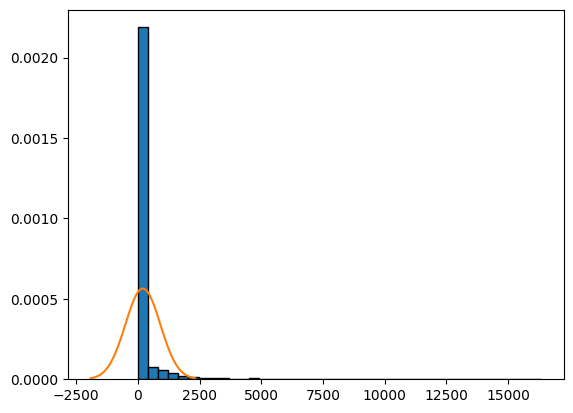

Mean : 196.67
Variance : 499771.25


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

df = pd.read_excel("data.xls")

transactions = df["تعداد معاملات"].tolist()
transactions.extend([0] * (6762-len(transactions)))

mean = statistics.mean(transactions)
variance = statistics.variance(transactions)

plt.hist(transactions,density=True, bins=40,edgecolor='black')
sigma = np.sqrt(variance)
x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
y = norm.pdf(x, mean, sigma)
plt.plot(x, y)
plt.show()

print("Mean : "+str(round(mean,2)))
print("Variance : "+str(round(variance,2)))

## Simulation 10

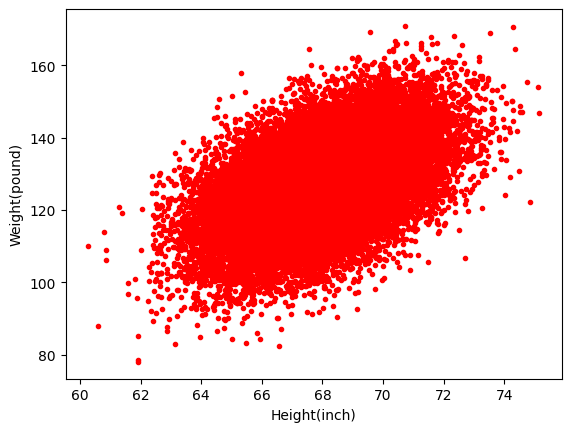

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HandW.csv")

Height = df['Height'].to_list()
Weight = df['Weight'].to_list()

plt.plot(Height,Weight,'r.')
plt.xlabel("Height(inch)")
plt.ylabel("Weight(pound)")
plt.show()

## Simulation 11

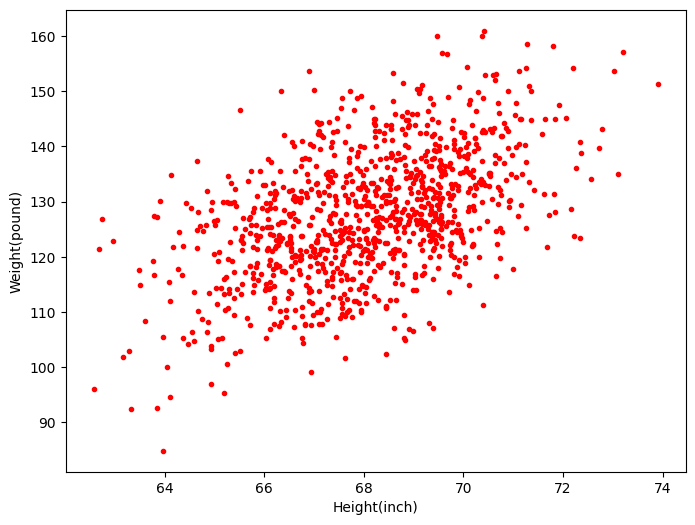

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HandW.csv")

np.random.seed(400101272)
sample_datas = df.sample(n=1000)

Height = sample_datas['Height'].to_list()
Weight = sample_datas['Weight'].to_list()

plt.plot(Height,Weight,'r.')
plt.xlabel("Height(inch)")
plt.ylabel("Weight(pound)")
plt.show()

## Simulation 12

C:\Users\ALPHA\AppData\Local\Temp\ipykernel_92240\2867331809.py:27: RankWarning: Polyfit may be poorly conditioned
  fit_poly(n)


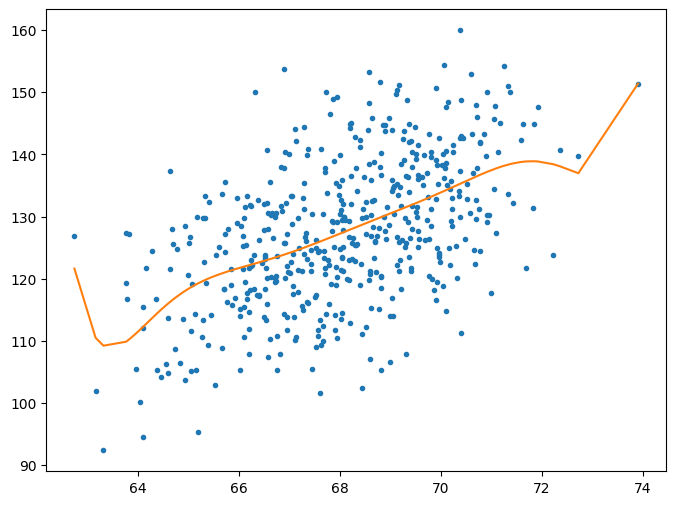

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    return plt.plot( curve.x, curve.fit, label='fit' )


n = 10
np.random.seed(400101272)
df = pd.read_csv("HandW.csv")

sample_datas = df.sample(n=500)
sample_datas_sorted = sample_datas.sort_values('Height', ascending=True)


Height = sample_datas_sorted['Height']
Weight = sample_datas_sorted['Weight']

x = np.array(sample_datas_sorted['Height'])
y = np.array(sample_datas_sorted['Weight'])
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')

fit_poly(n)

## Simulation 13

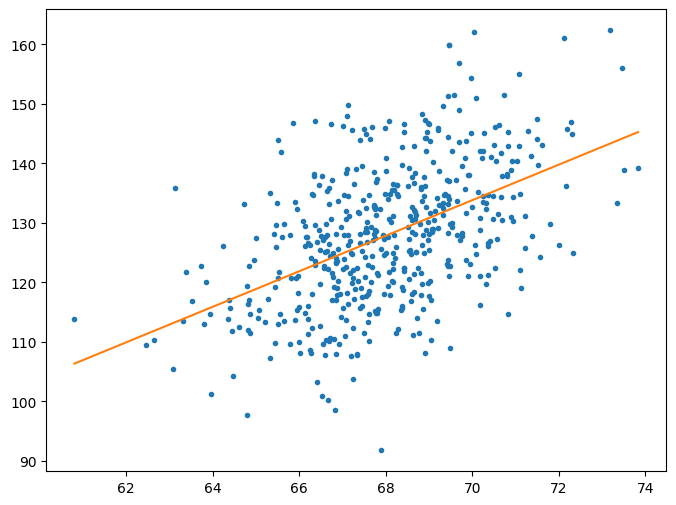

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    return plt.plot( curve.x, curve.fit, label='fit' )


n = 1
df = pd.read_csv("HandW.csv")

sample_datas = df.sample(n=500)
sample_datas_sorted = sample_datas.sort_values('Height', ascending=True)


Height = sample_datas_sorted['Height']
Weight = sample_datas_sorted['Weight']

np.random.seed(400101272)
x = np.array(sample_datas_sorted['Height'])
y = np.array(sample_datas_sorted['Weight'])
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')


fit_poly(n)


## Simulation 14

Degree 7: MSE = 2.68


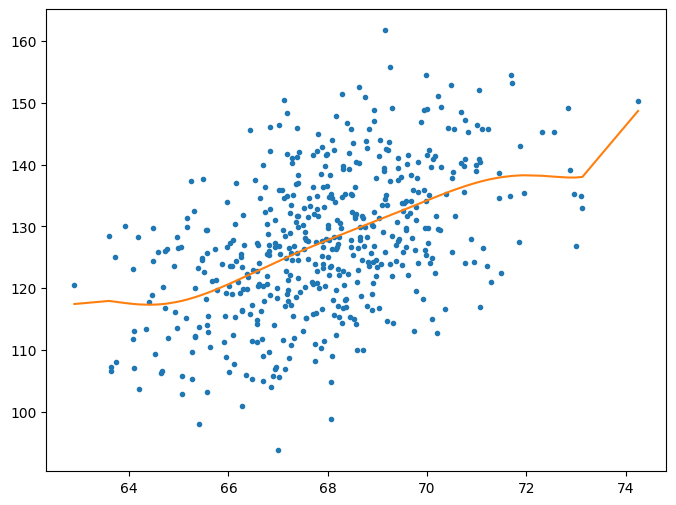

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    return plt.plot( curve.x, curve.fit, label='fit' )

df = pd.read_csv('HandW.csv')

dff = df.sort_values('Height', ascending=True)

np.random.seed(400101272)

X_train, X_test, y_train, y_test = train_test_split(dff['Weight'], dff['Height'], test_size=0.2)

degrees = [i for i in range(1, 101)]
mse_min=100
degree_min=0
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train.values.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    X_test_poly = poly_features.transform(X_test.values.reshape(-1, 1))
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    if mse<mse_min:
        mse_min=mse
        degree_min = degree

print(f"Degree {degree_min}: MSE = {round(mse_min,2)}")

n = degree_min
sample_datas = df.sample(n=500)
sample_datas_sorted = sample_datas.sort_values('Height', ascending=True)


Height = sample_datas_sorted['Height']
Weight = sample_datas_sorted['Weight']

x = np.array(sample_datas_sorted['Height'])
y = np.array(sample_datas_sorted['Weight'])
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')

fit_poly(n)